In [41]:
# SUMMARY
# A - Data load
# B - DATA CHECKS
# C - DATA ENRICHMENTS - match countries & city characteristics
# D - DATA CATEGORISATION - create categories
# E - STATS & CORRELATIONS

In [42]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = '../data/people.csv'
people = read_csv(people_filename)

people[0]

{'32': '',
 '32.betterworse': 'KO',
 'Age': '30',
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': '0',
 'Occupation type': 'Student',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': '10'}

In [43]:
# -------------------------------------------- #
# B - DATA CHECKS
# -------------------------------------------- #
# Part 1 - Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [44]:
# -------------------------------------------- #
# DATA CHECKS
# -------------------------------------------- #
# 2 - Adult / Children

In [45]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'32': '',
 '32.betterworse': 'KO',
 'Age': 30,
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': 0,
 'Occupation type': 'Student',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': 10}

In [46]:
df_people = pd.DataFrame(people)
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Occupation type,Place of living,REF,Type of school,Years of studies
0,,KO,30,Adult,Australia,,F,Phd Student,0,Student,Sydney,AUS001,"Law, Health",10
1,,KO,32,Adult,China,,F,Former Consultant,0,Executive & intellectual occupation,Paris,CHN01,Engineering,5
2,,KO,69,Adult,France,,F,Retiree,3,Retiree,Cucq,FR001,,1
3,,KO,58,Adult,France,,M,Farmer,2,Farmer,La Calotterie,FR002,,0
4,,KO,28,Adult,Madagascar,,F,Singer,0,Executive & intellectual occupation,Paris,MAD001,,3


In [47]:
# -------------------------------------------- #
# C - DATA ENRICHMENTS - match countries & city characteristics
# -------------------------------------------- #
# Part 1 - City population 

def is_int(input):
  try:
    num = int(input)
  except ValueError:
    return False
  return True

cities_filename = "../data/citiesList-enriched-16july.csv"
df_cities = pd.DataFrame( read_csv(cities_filename) )

def int_convert(input):
    value = -1
    if is_int(input) == True:
        value = int(input)
    return value
    
df_cities['populationInt'] = df_cities.apply(lambda x: int_convert(x['population']), axis=1)

df_people = pd.merge(df_people, df_cities, on='Place of living', how='left')
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Occupation type,Place of living,REF,Type of school,Years of studies,capital,population,populationInt
0,,KO,30,Adult,Australia,,F,Phd Student,0,Student,Sydney,AUS001,"Law, Health",10,True,4840600,4840600
1,,KO,32,Adult,China,,F,Former Consultant,0,Executive & intellectual occupation,Paris,CHN01,Engineering,5,True,2206488,2206488
2,,KO,69,Adult,France,,F,Retiree,3,Retiree,Cucq,FR001,,1,False,5123,5123
3,,KO,58,Adult,France,,M,Farmer,2,Farmer,La Calotterie,FR002,,0,False,649,649
4,,KO,28,Adult,Madagascar,,F,Singer,0,Executive & intellectual occupation,Paris,MAD001,,3,True,2206488,2206488


In [49]:
# Check if all cities are covered
print(df_people['population'].unique())
print(df_people['capital'].unique())
#df_people[ (df_people['capital'] != 'True') & (df_people['capital'] != 'False') ]

print("\n List of capitals : ")
df_know_capital = df_people[ df_people['capital'] == 'True' ]
print(len(df_know_capital))
print(df_know_capital["Place of living"].unique())
print(df_know_capital['Place of living'].value_counts())

df_unknow_capital = df_people[ df_people['capital'] == 'City not found' ]
print("\n Number of people with unknow city's capital status (= unknow city) : ")
print(len(df_unknow_capital))
print(df_unknow_capital["Place of living"].unique())


df_unknow_population = df_people[ (df_people['population'] == 'Not found') | (df_people['population'] == 'City not found') ]
print("\n Number of people with unknow city's population : ")
print(len(df_unknow_population))
print(df_unknow_population["Place of living"].unique())


['4840600' '2206488' '5123' '649' '5888926' 'Not found' '64450' '438800'
 '3182981' '8787892' '14657434' '277270' '2890151' '10849' '1403000'
 '28339' '110993' '536000' '8537673' '5640' '135783' '598830' '1756926'
 '10585' '757184' '1984' '8846782' '8574974' '435114' '6093472' '85428'
 '2902927' 'City not found' '2046' '8181047' '507324' '32781' '1197816'
 '384320' '680250' '98153' '12500123' '1082400' '623736' '1500' '9857426'
 '1396288' '2689845' '5430000' '1726889' '257803' '876824' '3976322'
 '4496694' '10535000' '975453' '5480' '1565572' '1464301' '3385000'
 '1756126' '653337' '60928' '16431' '7143']
['True' 'False' 'City not found']

 List of capitals : 
222
['Sydney' 'Paris' 'Madrid' 'London' 'Strasbourg' 'Buenos Aires' 'La Paz'
 'Tehran' 'Lima' 'Bogotá' 'Tbilisi' 'Seoul' 'Ulaanbaatar' 'Taipei'
 'New Delhi' 'Bangalore' 'Kathmandu' 'Addis Ababa']
Paris           60
London          34
New Delhi       22
Madrid          21
Ulaanbaatar     18
Tehran          17
Addis Ababa     15
Ka

In [50]:
# Part 2 - Country data

countries_filename = "../data/UNSD-countries.csv"
df_countries = pd.DataFrame( read_csv(countries_filename) )
df_countries = df_countries[['Country or Area', 'Developed / Developing Countries', 'Region Name', 'Sub-region Name']]
df_countries.columns = ['Country 1', 'Country Development', 'Continent', 'World Region']
#df_countries.head()

df_people = pd.merge(df_people, df_countries, on='Country 1', how='left')
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Occupation type,Place of living,REF,Type of school,Years of studies,capital,population,populationInt,Country Development,Continent,World Region
0,,KO,30,Adult,Australia,,F,Phd Student,0,Student,Sydney,AUS001,"Law, Health",10,True,4840600,4840600,Developed,Oceania,Australia and New Zealand
1,,KO,32,Adult,China,,F,Former Consultant,0,Executive & intellectual occupation,Paris,CHN01,Engineering,5,True,2206488,2206488,Developing,Asia,Eastern Asia
2,,KO,69,Adult,France,,F,Retiree,3,Retiree,Cucq,FR001,,1,False,5123,5123,Developed,Europe,Western Europe
3,,KO,58,Adult,France,,M,Farmer,2,Farmer,La Calotterie,FR002,,0,False,649,649,Developed,Europe,Western Europe
4,,KO,28,Adult,Madagascar,,F,Singer,0,Executive & intellectual occupation,Paris,MAD001,,3,True,2206488,2206488,Developing,Africa,Sub-Saharan Africa


In [51]:
# Check if all countries are covered
print(df_people['Continent'].unique())
# not_found = df_people[ (df_people['Continent'] != 'Oceania') & (df_people['Continent'] != 'Asia') & (df_people['Continent'] != 'Europe')  & (df_people['Continent'] != 'Africa') & (df_people['Continent'] != 'Americas') ]
# not_found['Country 1'].unique()

['Oceania' 'Asia' 'Europe' 'Africa' 'Americas']


In [52]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for quantitative attributes
# -------------------------------------
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 15, 25, 35, 50, 65, 200], 'labels': ['0-15', '15-25', '25-35', '35-50', '50-65','65+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 2, 5, 20], 'labels': ['0-2', '2-5', '5+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 5, 20], 'labels': ['0', '1', '2-5', '5+']
    },
    {
        'index':'populationInt', 'indexCategory':'populationCategory',
        'bins': [0, 5000, 15000, 100000, 1000000, 5000000, 1000000000000], 'labels': ['0-5k', '5-15k', '15-100k','100k-1M', '1M-5M', '5M+']
    }
]

# Create all category from quantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

def getCityType(population):
    type = "Urban"
    if is_int(population) == False:
        type = "Undefined population"
    elif int(population) < 5000:
        type = "Rural"
    return type

df_people['City Type'] = df_people.apply(lambda x: getCityType(x['population']), axis=1)
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Occupation type,...,population,populationInt,Country Development,Continent,World Region,AgeCategory,YearsStudiesCategory,NumberKidsCategory,populationCategory,City Type
0,,KO,30,Adult,Australia,,F,Phd Student,0,Student,...,4840600,4840600,Developed,Oceania,Australia and New Zealand,25-35,5+,0,1M-5M,Urban
1,,KO,32,Adult,China,,F,Former Consultant,0,Executive & intellectual occupation,...,2206488,2206488,Developing,Asia,Eastern Asia,25-35,2-5,0,1M-5M,Urban
2,,KO,69,Adult,France,,F,Retiree,3,Retiree,...,5123,5123,Developed,Europe,Western Europe,65+,0-2,2-5,5-15k,Urban
3,,KO,58,Adult,France,,M,Farmer,2,Farmer,...,649,649,Developed,Europe,Western Europe,50-65,0-2,2-5,0-5k,Rural
4,,KO,28,Adult,Madagascar,,F,Singer,0,Executive & intellectual occupation,...,2206488,2206488,Developing,Africa,Sub-Saharan Africa,25-35,2-5,0,1M-5M,Urban


In [53]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for qualitative attributes
# -------------------------------------
# -> This is handled at the previous data gathering step for Job Category


In [54]:
#export for d3 cluster tests
df_people[['Gender','Age','AgeCategory']].to_csv('peopleWithCategories.csv')

In [55]:
# -------------------------------------------- #
# E - STATS & CORRELATIONS
# -------------------------------------------- #
# - PART 1 STATS ABOUT PEOPLE CHARACTERISTICS
# -------------------------------------------- #

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [56]:
#sns.countplot(y="Country Development", data=df_people, color="c");
#sns.swarmplot(x=df_people["Years of studies"])

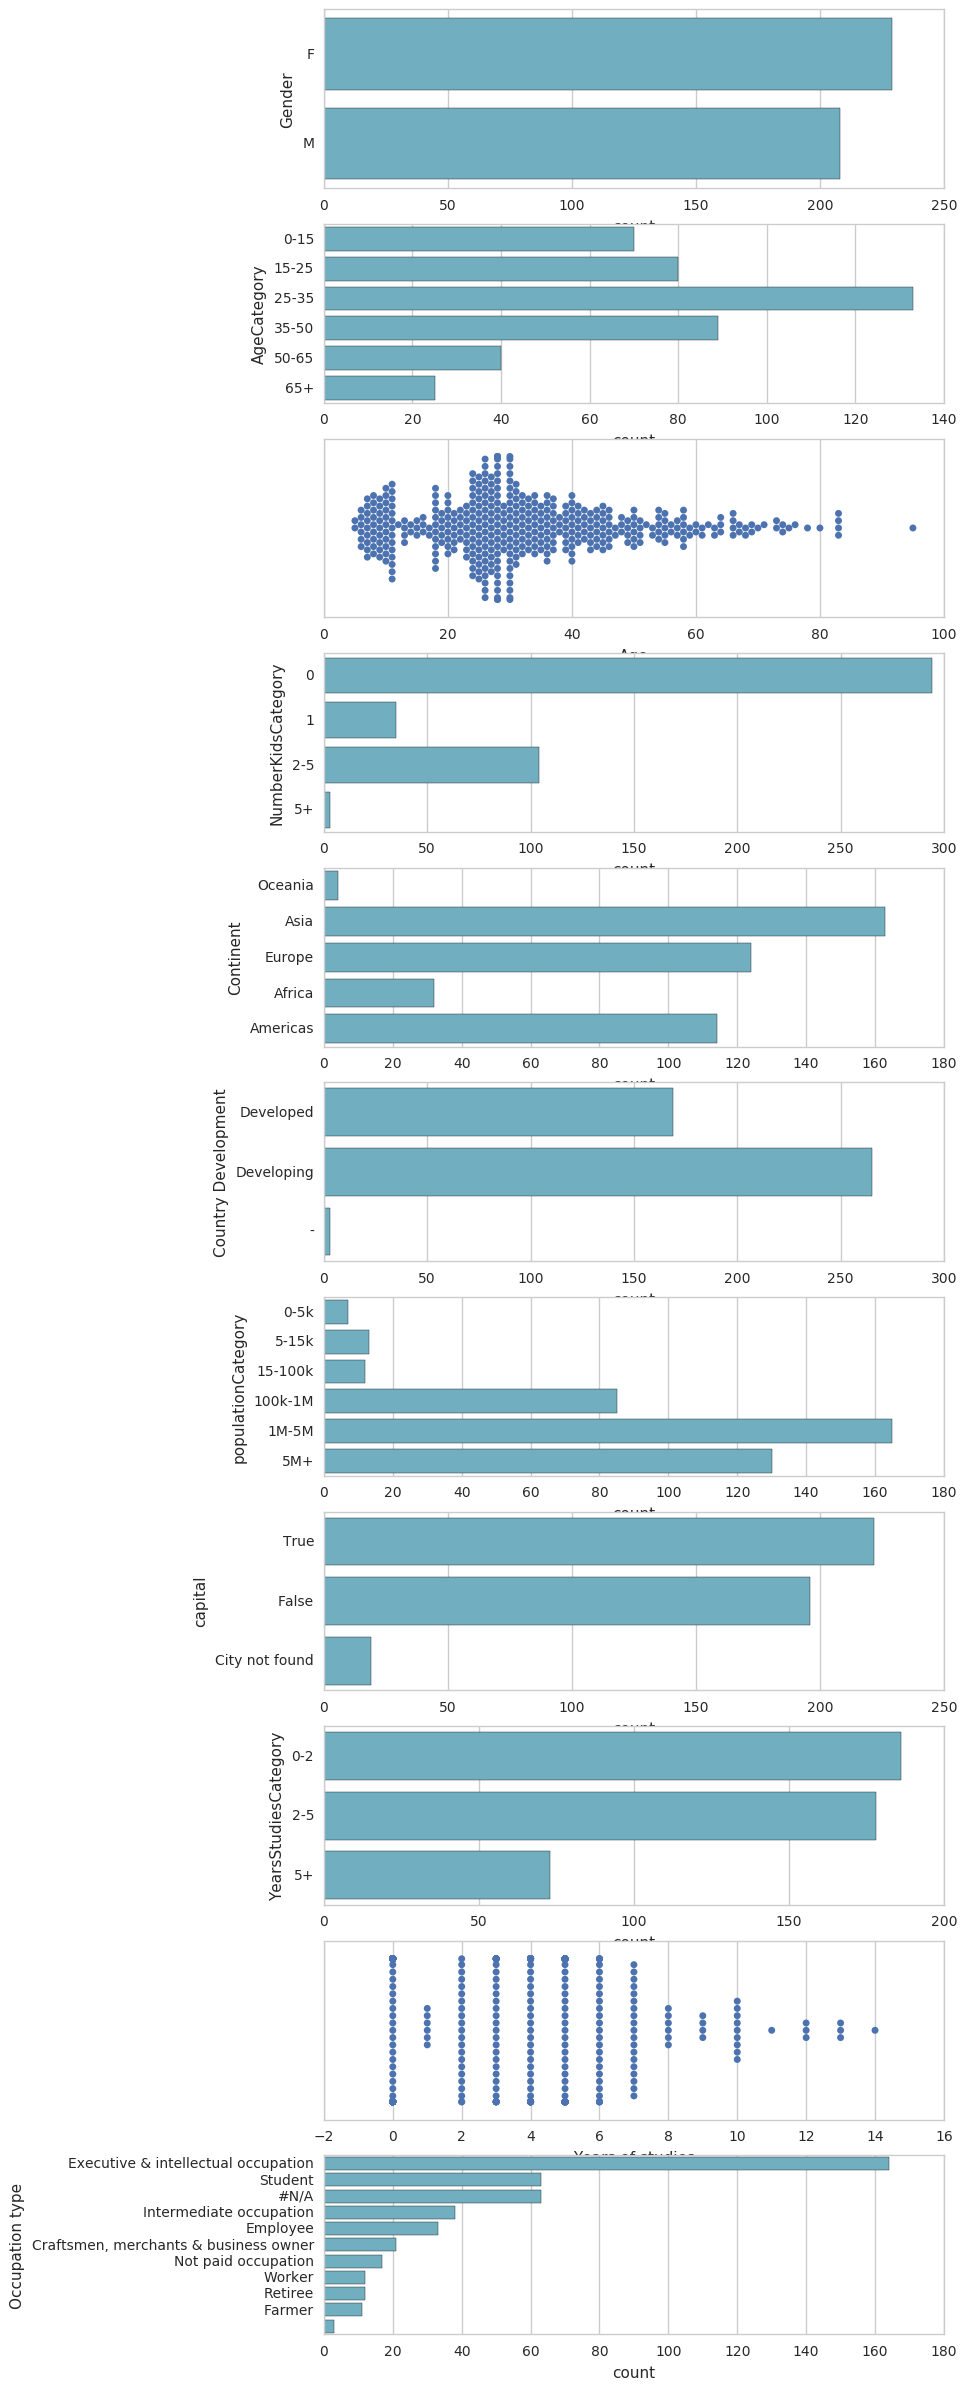

In [57]:
# Overview of people characteristics

fig, axarr = plt.subplots(11, 1, figsize=(8, 30))

sns.countplot(y="Gender", data=df_people, color="c", ax=axarr[0]);

sns.countplot(y="AgeCategory", data=df_people, color="c", ax=axarr[1]);
sns.swarmplot(x=df_people["Age"], ax=axarr[2]);

sns.countplot(y="NumberKidsCategory", data=df_people, color="c", ax=axarr[3]);

sns.countplot(y="Continent", data=df_people, color="c", ax=axarr[4]);
sns.countplot(y="Country Development", data=df_people, color="c", ax=axarr[5]);
sns.countplot(y="populationCategory", data=df_people, color="c", ax=axarr[6]);
sns.countplot(y="capital", data=df_people, color="c", ax=axarr[7]);

sns.countplot(y="YearsStudiesCategory", data=df_people, color="c", ax=axarr[8]);
sns.swarmplot(x=df_people["Years of studies"], ax=axarr[9]);

# Repartition of occupation type
sns.countplot(
    y="Occupation type", 
    data=df_people, 
    color="c",
    order = df_people['Occupation type'].value_counts().index,
    ax=axarr[10]);
#sns.swarmplot(x=df_people["population"],ax=axarr[4]);

/home/grossedondon/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


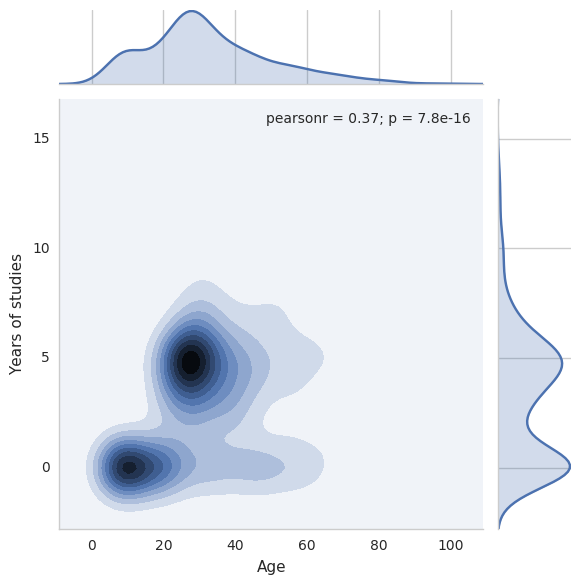

In [144]:
#More fancy chart
sns.jointplot(x="Age", y="Years of studies", data=df_people, kind="kde");

In [ ]:
sns.jointplot(df_people['Age'], df_people['populationInt'], kind="hex", color="#4CB391")

In [247]:
# - PART 1 STATS REGARDING 32 ANSWEWS
# -------------------------------------------- #

# Check the 32 distribution compared to age

df_32 = df_people[df_people['32'] != '']
print("People answering the 32 question")
print(str(round(len(df_32)/len(df_people)*100,1)) + "% of people\n")

cols_ordered = ["Better", "Both", "Worse", "Neutral", "Cannot compare"]


People answering the 32 question
32.7% of people



In [264]:
# function draw heatmap
def dataHeatmap(data,question,characteristic,cols_ordered):
    cross = pd.crosstab(index=data[characteristic], columns=df_32[question], normalize='index', margins=True)
    cross = cross[cols_ordered]
    return cross

def drawHeatmap(data,question,characteristic,cols_ordered,fig_size_x,fig_size_y):
    #cross = pd.crosstab(index=data[characteristic], columns=df_32[question], normalize='index', margins=True)
    #cross = cross[cols_ordered]
    cross = dataHeatmap(data,question,characteristic,cols_ordered)
    scale = len(cols_ordered) / (len(data[characteristic].unique())+1)
    #print(len(cols_ordered))
    #print(len(data[characteristic].unique())+1)
    print("scale :  " + str(scale))
    plt.figure(figsize=(fig_size_x,fig_size_y))
    sns.heatmap(cross, linewidths=2, linecolor='white', cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))

def viewSmallCategorical(data, question, categorical, cols_ordered):
    #fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
    ig, axarr = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw = {'width_ratios':[5, 3]})
    
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[0])
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[1])
    
def dualViewQuantitative(data, question, quanti, categorical):
    fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
    
    sns.heatmap(dataHeatmap(data,question,categorical,cols_ordered), linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr[0])
    sns.countplot(x=question, hue=categorical, data=data, ax=axarr[1])
    
    sns.violinplot(x=quanti, y=question, data=data, bw=.2, ax=axarr[2])
    sns.swarmplot(x=quanti, y=question, color="k", size=3, data=data, ax=axarr[2])


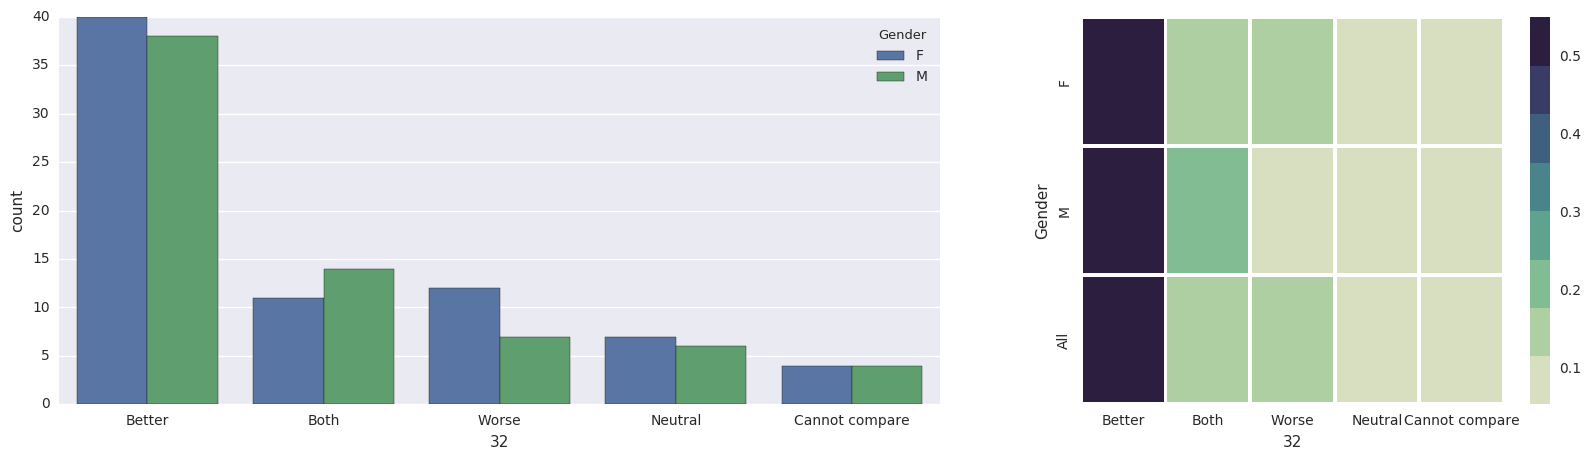

In [265]:
viewSmallCategorical(df_32,"32", "Gender", cols_ordered);
#sns.countplot(y="32", hue="Gender", data=df_32)
#drawHeatmap(df_32,'32','Gender',cols_ordered, 4, 2)
#pd.crosstab(index=df_32.Gender, columns=df_32['32'], normalize='index', margins=True)
#pd.crosstab(index=df_32['32'], columns=df_32.Gender, normalize='index', margins=True)

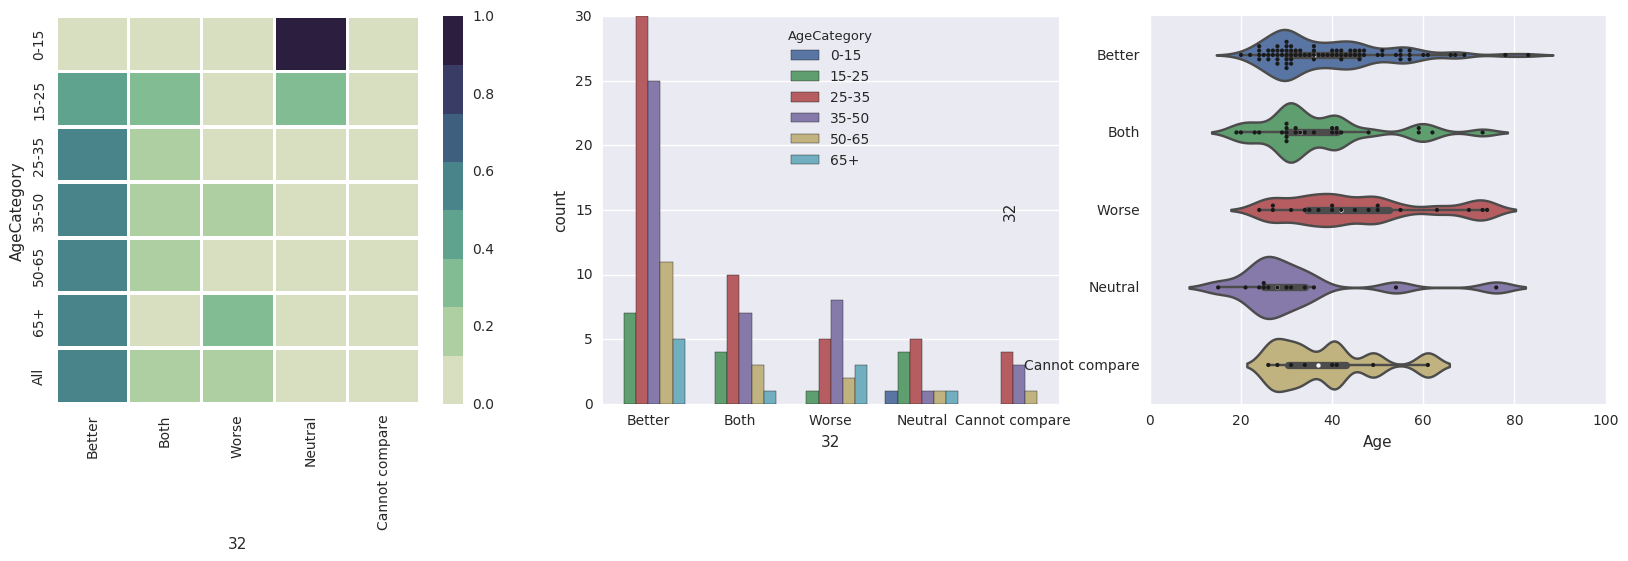

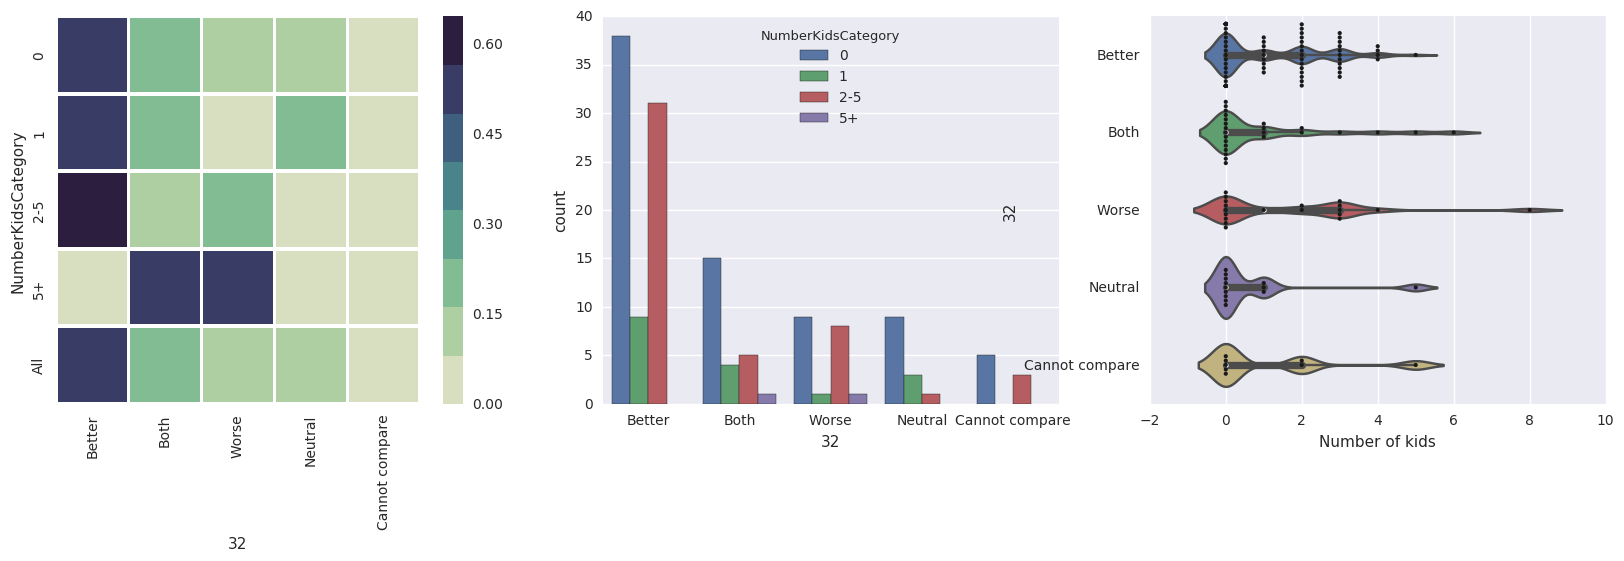

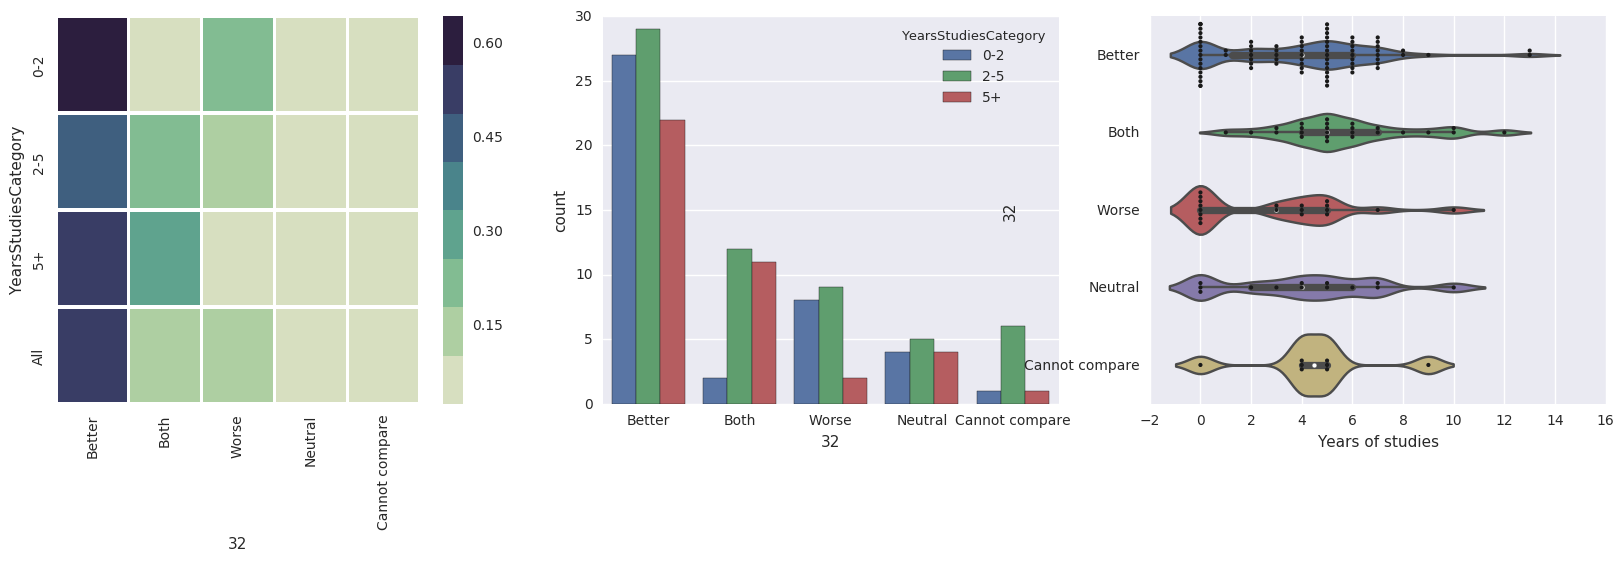

In [242]:
dualViewQuantitative(df_32,"32", "Age", "AgeCategory");
dualViewQuantitative(df_32,"32", "Number of kids", "NumberKidsCategory");
dualViewQuantitative(df_32,"32", "Years of studies", "YearsStudiesCategory");

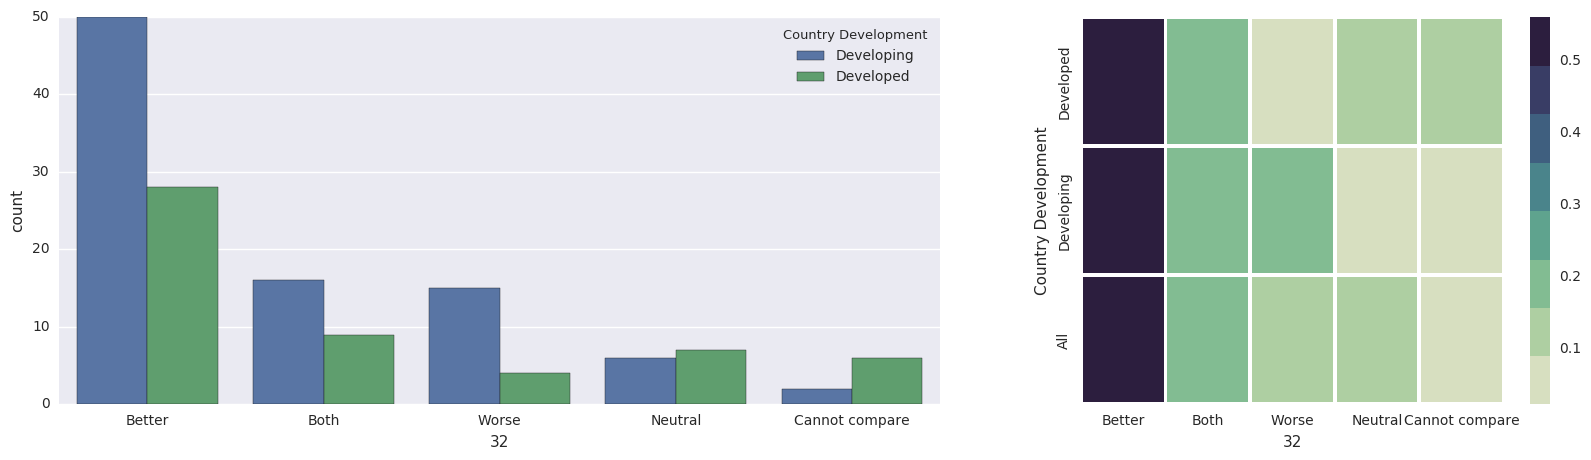

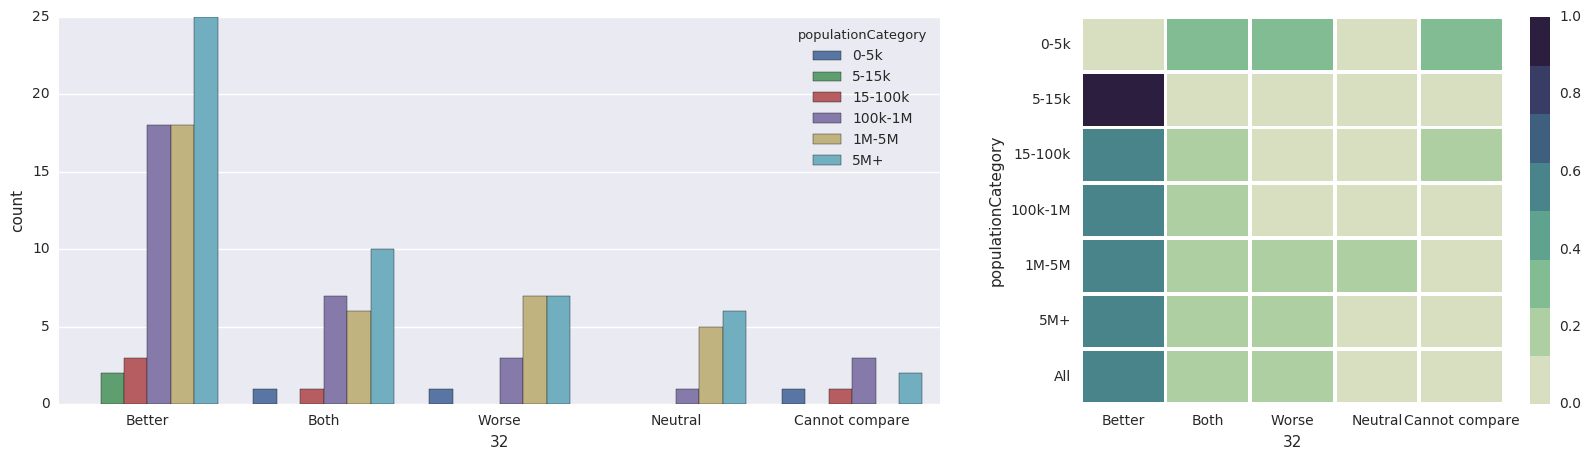

In [267]:
#sns.countplot(y="32", hue="Country Development", data=df_32)
viewSmallCategorical(df_32,"32", "Country Development", cols_ordered);
viewSmallCategorical(df_32,"32", "populationCategory", cols_ordered);

In [154]:
cross_continent_perc = pd.crosstab(index=df_32['Continent'], columns=df_32['32'], normalize='index', margins=True)
#cross_continent_perc = pd.CategoricalIndex(cross_continent_perc.index, categories= ["Better", "Both", "Worse", "Neutral", "Cannot compare"])
#cross_continent_perc
cols = cross_continent_perc.columns.tolist()
cross_continent_perc = cross_continent_perc[cols_ordered]
#cross_continent_perc.sort_values('Worse', ascending=True)
cross_continent_perc

32,Better,Both,Worse,Neutral,Cannot compare
Continent,,,,,
Africa,0.500000,0.100000,0.200000,0.200000,0.000000
Americas,0.622951,0.131148,0.114754,0.065574,0.065574
Asia,0.500000,0.208333,0.166667,0.083333,0.041667
Europe,0.500000,0.181818,0.090909,0.136364,0.090909
Oceania,0.000000,1.000000,0.000000,0.000000,0.000000
All,0.545455,0.174825,0.132867,0.090909,0.055944


In [147]:
cross_continent_perc_2 = pd.crosstab(index=df_32['32'], columns=df_32['Continent'], normalize='index', margins=True)
#cross_continent_perc_2

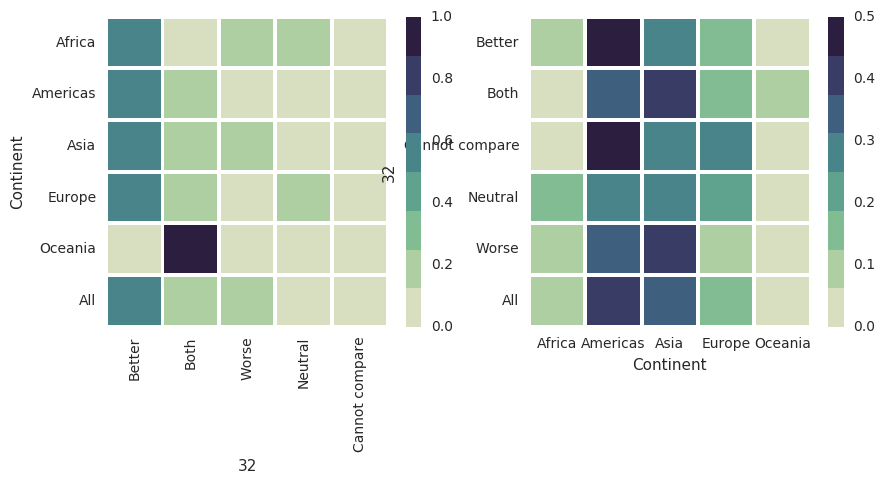

In [148]:
fig_2, axarr_2 = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cross_continent_perc, linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr_2[0])

sns.heatmap(cross_continent_perc_2, linewidths=2, linecolor='white', 
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            ax=axarr_2[1])

scale :  0.4166666666666667


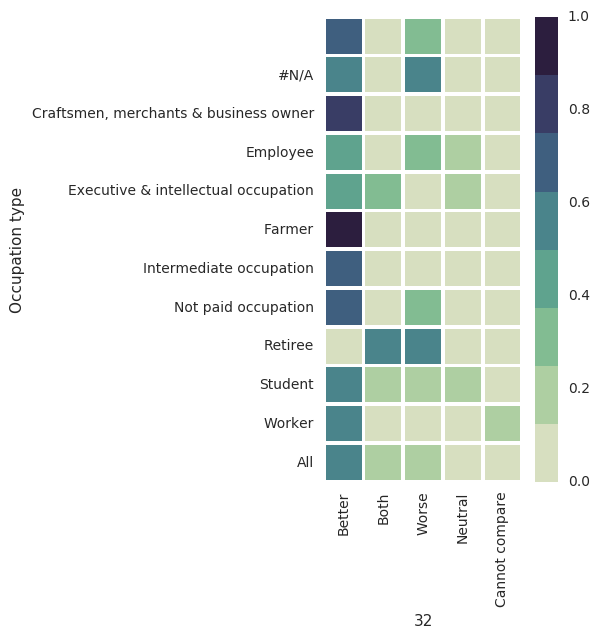

In [246]:
#drawHeatmap(df_32,'32','NumberKidsCategory',cols_ordered, 4, 3)
#drawHeatmap(df_32,'32','AgeCategory',cols_ordered, 4, 4.2)
drawHeatmap(df_32,'32','Occupation type',cols_ordered, 3.2, 6)